# Covid-19 in Austria

In [32]:
# first we have to import numpy
import numpy as np

# we open the csv file and extract the data
data = open("covid_19_austria.csv", "r");
# then we convert it into a multidimensional array
dataset = np.loadtxt(data, delimiter=", ")
# we close the file
data.close()

# starts with t=0 (25.02.2020)

In [33]:
# we import random as rn
import random as rn

# we create a class exponential_model which we use later on to predict future cases
class exponential_model:
    
    # in the constructor, we have one parameter that corresponds to b in the following formula:
    #     f(x) = b * a^x
    def __init__(self, start, size):
        self.start = start
        # a we initialize with a random value between 0 and 2
        self.a = rn.random() * 2
        # define the size
        self.size = size
    
    # this function we want to use to predict cases on a given day 
    def predict(self, x):
        return self.start * self.a ** x
    
    # this function is used to train the model
    # x - time in days (t=0 on 25/02/2020)
    # y - the absolut number of cases at time t
    # epochs - number of epochs
    # lr - learning rate (0 < lr < 1; [0;1])
    # show - some debug things
    def train(self, x, y, epochs, lr, show):
        # we initialize epochs with 0
        epoch = 0
        # we execute the following code epochs-times
        while (epoch < epochs):
            # increment epochs by one
            epoch += 1
            # go through all xs
            for i in range(self.size):
                # if t != 0 (we cannot divide by 0)
                if(x[i] != 0):
                    if(show):
                        print(str(y[i]) + " | " + str(x[i]))
                    # te actual a (target a) is the x-th root of y
                    # comes from rearranging the formula:
                    # f(x) = b*a^x <-> y^(1 / x); where 1/x is the x-th root
                    target_a = y[i] ** (1 / x[i])
                    # the error is the actual a minus the current a
                    error = target_a - self.a
                    if(show):
                        print("a=" + str(self.a) + ", epoch: " + str(epoch) + ", error=" + str(error))
                    # we have to multiply the error with the learning rate in order to get dalta a
                    delta_a = error * lr
                    # update the a by delta a
                    self.a += delta_a
                    
    # function is used to get the mean squared error (that we want to minimize)    
    # MSE = sum(y_target - y_predicted)^2 / number of training examples
    def mean_squared_error(self, x, y):
        sum = 0
        for i in range(self.size):
            sum += (y[i] - self.predict(x[i])) ** 2
        return sum / self.size
    
    
    # doubling time
    def doubling_time(self):
        return 2 ** (1 / self.a)

In [34]:
# import matplotlib.pyplot to create some figures
import matplotlib.pyplot as plt

# define x (time) and y (absolute cases)
x = dataset[::,0]
y = dataset[::,1]

# create a figure, define axis
figure = plt.figure(1)
ax = figure.add_subplot(1,1,1)
ax.scatter(x, y, c='red', s=10, alpha=.6)
ax.set_xlabel('t in days')
ax.set_ylabel('absolute cases')
ax.grid(True, linestyle='-', color='0.5')

MSE (before training) = 31307573.4036


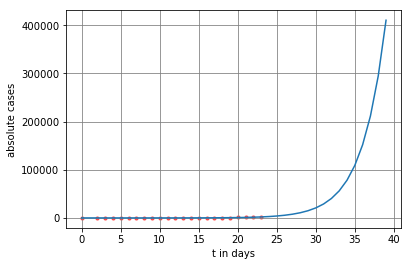

f(x) = 1.39293141625^x
MSE (after training) = 18422.2941367


In [35]:
# create a new exponential_model
model = exponential_model(1, x.size)

# print mean squared error 
print("MSE (before training) = " + str(model.mean_squared_error(x,y)))

# train the model
model.train(x, y, epochs=100, lr=0.9, show=False)

# define the range in days 
days = range(40)

# plt the graph of model's function
plt.plot(days, model.predict(days))

# show the figure
plt.show()

# print the equation of the function
print("f(x) = " + str(model.a) + "^x")

# print the error again
print("MSE (after training) = " + str(model.mean_squared_error(x,y)))

In [ ]:
# Verdopplung 
model.doubling_time()